In [1]:
%matplotlib widget

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
# Load the file
who_csv = Path('../Project 1 - Group 3/Resources/WHO-COVID-19-global-data.csv')
layoff_csv = Path('../Project 1 - Group 3/Resources/layoff_2021.csv')
quit_csv = Path('../Project 1 - Group 3/Resources/quit_2021.csv')

# layoff and quit csv are from the Bureau of Labor

# Read data sets for new deaths, layoffs, and voluntary withdrawl
who_data = pd.read_csv(who_csv)
layoff_data = pd.read_csv(layoff_csv)
quit_data = pd.read_csv(quit_csv)


Start Work on Labor Bureau Statistics

In [4]:
# Clean up labor data to show only 2021
layoff_data_2021 = layoff_data[layoff_data['Year']==2021]
quit_data_2021 = quit_data[quit_data['Year']==2021]


# Clean up labor data to include only period and value
layoff_data_2021 = layoff_data_2021[['Period', 'Value']]
quit_data_2021 = quit_data_2021[['Period', 'Value']]

# Rename period to month and value to layoff/quit by the thousand
layoff_data_2021 = layoff_data_2021.rename(columns={'Period':'Month', 'Value':'Layoff'})
quit_data_2021 = quit_data_2021.rename(columns={'Period':'Month', 'Value':'Quit'})

In [5]:
print(layoff_data_2021)
print(quit_data_2021)

    Month  Layoff
96    M01    2705
97    M02    2259
98    M03    2086
99    M04    2072
100   M05    1829
101   M06    1814
102   M07    1220
103   M08    1213
104   M09    1094
105   M10    1026
106   M11     870
107   M12     801
    Month  Quit
96    M01   654
97    M02   707
98    M03   769
99    M04   819
100   M05   786
101   M06   944
102   M07   926
103   M08   827
104   M09   789
105   M10   844
106   M11   839
107   M12   725


In [6]:
# Show only the layoff/quit per thousand
layoff_data_2021 = layoff_data_2021[['Layoff']]
quit_data_2021 = quit_data_2021[['Quit']]

# Reset the index so we can merge the csv later on
layoff_data_2021 = layoff_data_2021.reset_index(drop=True)
quit_data_2021 = quit_data_2021.reset_index(drop=True)



In [7]:
print(layoff_data_2021)
print(quit_data_2021)

    Layoff
0     2705
1     2259
2     2086
3     2072
4     1829
5     1814
6     1220
7     1213
8     1094
9     1026
10     870
11     801
    Quit
0    654
1    707
2    769
3    819
4    786
5    944
6    926
7    827
8    789
9    844
10   839
11   725


In [8]:
# Merge the two csv on index
merge_labor_df = pd.merge(layoff_data_2021, quit_data_2021, left_index=True, right_index=True)

# Show new csv
print(merge_labor_df)

    Layoff  Quit
0     2705   654
1     2259   707
2     2086   769
3     2072   819
4     1829   786
5     1814   944
6     1220   926
7     1213   827
8     1094   789
9     1026   844
10     870   839
11     801   725


Start Work on WHO Data

In [9]:
# Set 'Date_reported' as the index
who_data = who_data.set_index('Date_reported')

#Convert the index to datetime format
who_data.index=pd.to_datetime(who_data.index)

In [10]:
#Convert the index to datetime format
who_data.index=pd.to_datetime(who_data.index)
who_data['Year'] = who_data.index.year
who_data['Month'] = who_data.index.month
who_data['Day'] = who_data.index.day

who_data

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Date_reported,,,,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020,1,3
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020,1,4
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1,5
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020,1,6
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...
2023-08-05,ZW,Zimbabwe,AFRO,0,265693,0,5712,2023,8,5
2023-08-06,ZW,Zimbabwe,AFRO,0,265693,0,5712,2023,8,6
2023-08-07,ZW,Zimbabwe,AFRO,0,265693,0,5712,2023,8,7


In [11]:
us_new_deaths = who_data[who_data['Country']=='United States of America']
us_new_deaths

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Date_reported,,,,,,,,,,
2020-01-03,US,United States of America,AMRO,0,0,0,0,2020,1,3
2020-01-04,US,United States of America,AMRO,0,0,0,0,2020,1,4
2020-01-05,US,United States of America,AMRO,0,0,0,0,2020,1,5
2020-01-06,US,United States of America,AMRO,0,0,0,0,2020,1,6
2020-01-07,US,United States of America,AMRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...
2023-08-05,US,United States of America,AMRO,0,103436829,0,1127152,2023,8,5
2023-08-06,US,United States of America,AMRO,0,103436829,0,1127152,2023,8,6
2023-08-07,US,United States of America,AMRO,0,103436829,0,1127152,2023,8,7


In [12]:
# Create a new dataframe with only 2021 for the U.S.
us_newdeath_2021 = us_new_deaths[us_new_deaths['Year']==2021]

# Group by month and get the max new deaths 
us_months = us_newdeath_2021.groupby('Month')['New_deaths'].max()
us_months = us_months.reset_index(drop=True)

us_months


0     4066
1     5061
2     1924
3      948
4      806
5      586
6      499
7     1837
8     2499
9     2330
10    3867
11    3177
Name: New_deaths, dtype: int64

In [13]:
# Merge WHO data and Labor data
final_df = pd.merge(merge_labor_df, us_months, left_index = True, right_index=True)

# Print to check if it worked
print(final_df)

    Layoff  Quit  New_deaths
0     2705   654        4066
1     2259   707        5061
2     2086   769        1924
3     2072   819         948
4     1829   786         806
5     1814   944         586
6     1220   926         499
7     1213   827        1837
8     1094   789        2499
9     1026   844        2330
10     870   839        3867
11     801   725        3177


In [14]:
# Include months 
new_col_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
final_df['Months'] = new_col_months

# Move the month column to the left
reordered_column = ['Months', 'New_deaths', 'Layoff', 'Quit']
final_df = final_df[reordered_column]

# Rename 'New_deaths' to New Deaths
final_df = final_df.rename(columns={'New_deaths' : 'New Deaths'})

final_df = final_df.set_index('Months')

final_df

,New Deaths,Layoff,Quit
Months,,,
Jan,4066,2705,654
Feb,5061,2259,707
Mar,1924,2086,769
Apr,948,2072,819
May,806,1829,786
Jun,586,1814,944
Jul,499,1220,926
Aug,1837,1213,827
Sept,2499,1094,789


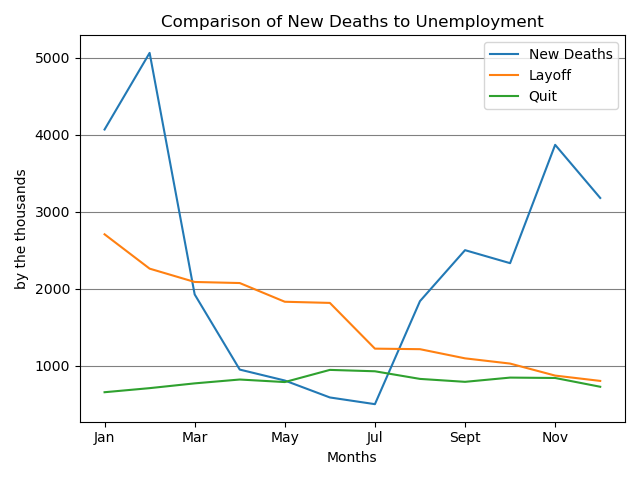

In [21]:
# Plot the line graph
final_df.plot(kind='line', alpha = .99)
plt.title('Comparison of New Deaths to Unemployment')
plt.ylabel('by the thousands')
plt.tight_layout()
plt.grid(True, axis ='y', color="gray")

# Save the graph
plt.savefig('../Project 1 - Group 3/New Deaths to Unemployment - Line Graph')

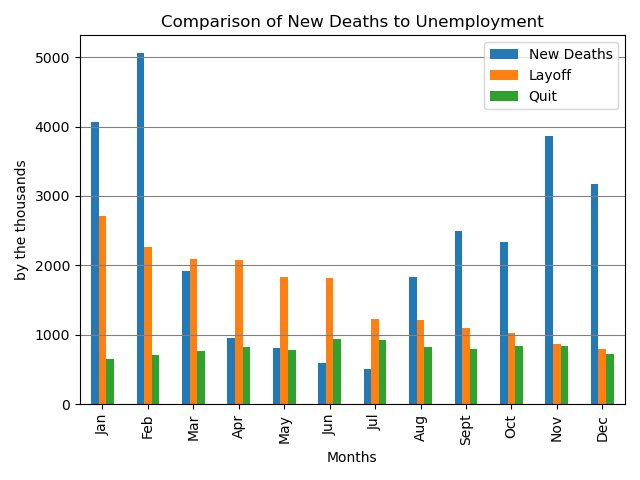

In [20]:
# Graph as a bar graph
# Plot the line graph
final_df.plot(kind='bar', alpha = .99)
plt.title('Comparison of New Deaths to Unemployment')
plt.ylabel('by the thousands')
plt.tight_layout()
plt.grid(True, axis ='y', color="gray")

# Save the bar graph
plt.savefig('../Project 1 - Group 3/New Deaths to Unemployment - Bar Graph')